In [16]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [5]:
df = pd.read_csv('credit_customers.csv')

In [8]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [10]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [14]:
## dropping the useless feature
df.drop(['num_dependents'], axis=1, inplace=True)

In [15]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,none,yes,bad


In [17]:
## encoding

ord_enc = OrdinalEncoder()

df['checking_status'] = ord_enc.fit_transform(df[['checking_status']])
df['credit_history'] = ord_enc.fit_transform(df[['credit_history']])
df['purpose'] = ord_enc.fit_transform(df[['purpose']])
df['savings_status'] = ord_enc.fit_transform(df[['savings_status']])
df['employment'] = ord_enc.fit_transform(df[['employment']])
df['personal_status'] = ord_enc.fit_transform(df[['personal_status']])
df['other_parties'] = ord_enc.fit_transform(df[['other_parties']])
df['property_magnitude'] = ord_enc.fit_transform(df[['property_magnitude']])
df['other_payment_plans'] = ord_enc.fit_transform(df[['other_payment_plans']])
df['housing'] = ord_enc.fit_transform(df[['housing']])
df['job'] = ord_enc.fit_transform(df[['job']])
df['own_telephone'] = ord_enc.fit_transform(df[['own_telephone']])
df['foreign_worker'] = ord_enc.fit_transform(df[['foreign_worker']])
df['class'] = ord_enc.fit_transform(df[['class']])

In [18]:
## splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

In [27]:
## ML model

model = XGBClassifier(
    learning_rate=0.20,
    n_estimators=300,
    max_depth=4,
)

In [28]:
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=60,
    eval_metric='error',
)

[0]	validation_0-error:0.24000
[1]	validation_0-error:0.24000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.22500
[4]	validation_0-error:0.22000
[5]	validation_0-error:0.24000
[6]	validation_0-error:0.24000
[7]	validation_0-error:0.23500
[8]	validation_0-error:0.21500
[9]	validation_0-error:0.23500
[10]	validation_0-error:0.23000
[11]	validation_0-error:0.22500
[12]	validation_0-error:0.22500
[13]	validation_0-error:0.22500
[14]	validation_0-error:0.22000
[15]	validation_0-error:0.21500
[16]	validation_0-error:0.21000
[17]	validation_0-error:0.21000
[18]	validation_0-error:0.20500
[19]	validation_0-error:0.20500
[20]	validation_0-error:0.21000
[21]	validation_0-error:0.20500
[22]	validation_0-error:0.21000
[23]	validation_0-error:0.21500
[24]	validation_0-error:0.21000
[25]	validation_0-error:0.21000
[26]	validation_0-error:0.21000
[27]	validation_0-error:0.20000
[28]	validation_0-error:0.22500
[29]	validation_0-error:0.21500
[30]	validation_0-error:0.21000
[31]	validation_0-

d:\CREDIT_RISK\devp\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
d:\CREDIT_RISK\devp\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-error:0.20000
[52]	validation_0-error:0.21000
[53]	validation_0-error:0.22000
[54]	validation_0-error:0.22000
[55]	validation_0-error:0.21000
[56]	validation_0-error:0.21000
[57]	validation_0-error:0.21500
[58]	validation_0-error:0.21500
[59]	validation_0-error:0.21000
[60]	validation_0-error:0.21000
[61]	validation_0-error:0.21000
[62]	validation_0-error:0.21500
[63]	validation_0-error:0.21500
[64]	validation_0-error:0.22000
[65]	validation_0-error:0.21000
[66]	validation_0-error:0.21500
[67]	validation_0-error:0.21500
[68]	validation_0-error:0.20000
[69]	validation_0-error:0.21000
[70]	validation_0-error:0.20500
[71]	validation_0-error:0.20500
[72]	validation_0-error:0.21000
[73]	validation_0-error:0.21000
[74]	validation_0-error:0.20500
[75]	validation_0-error:0.20500
[76]	validation_0-error:0.20500
[77]	validation_0-error:0.20000
[78]	validation_0-error:0.19500
[79]	validation_0-error:0.19500
[80]	validation_0-error:0.20000
[81]	validation_0-error:0.20000
[82]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
## calculating the score

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions) * 100.0))

Accuracy: 81.00%


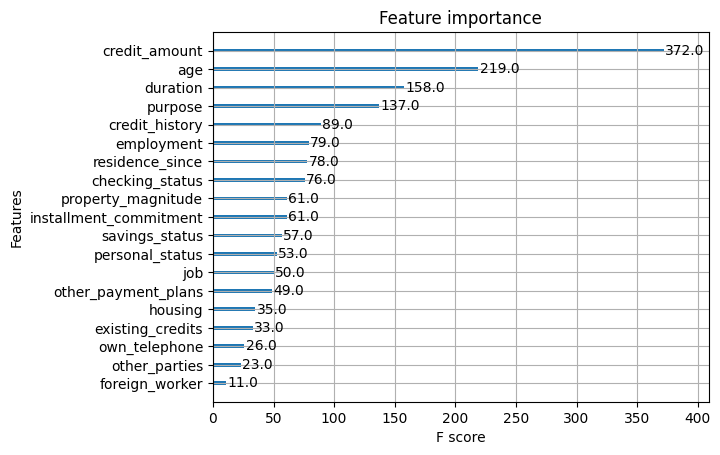

In [30]:
## plotting the imp features

xgb.plot_importance(model)
plt.show()